In [112]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd 
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, interact_manual
import matplotlib.ticker as tck
import os
sns.set_context("paper", rc = {'lines.markersize': 10})
sns.set(font_scale = 1.2)
sns.set_style("ticks")
# sns.set_palette("Reds")
sns.set_palette("twilight_shifted")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Typewriter",
    # "figure.figsize": (9,5)
})
palette = sns.color_palette('twilight_shifted', 4)

In [113]:
data_csv = "./data.csv"
data_df = pd.read_csv(data_csv, comment='#')
data_df['ratio'] = data_df['time'] / data_df['model']
# data_df
data_df['diff'] = 0
df_group = data_df.groupby(['simulation','analysis','data','node','scenario'])
for index, group in df_group:
    data_df['diff'][data_df.index.isin(group.index)] = group['time'] / group[group['heuristic'] == 'model-model']['time'].values[0]
data_df


/home/cc/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,simulation,analysis,data,node,scenario,heuristic,time,model,ideal-normalization,model-normalization,ratio,diff
0,1,4,4,128,ideal,model-model,5.2387,5.062746,1.000000,1.000000,1.034755,1.000000
1,1,4,4,128,ideal,model-even,5.4420,5.265256,1.000000,1.038807,1.033568,1.038807
2,1,4,4,128,ideal,even-model,5.2387,5.062746,1.000000,1.000000,1.034755,1.000000
3,1,4,4,128,ideal,even-even,5.4420,5.265256,1.000000,1.038807,1.033568,1.038807
4,1,4,4,128,transit,model-model,289.7234,5.649786,55.304446,1.000000,51.280417,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1947,8,4,4,128,decreasing0.5,even-even,1157.4459,162.770925,23.152345,1.001706,7.110888,1.001706
1948,8,4,4,128,decreasing0.75,model-model,1732.9026,42.324433,46.443698,1.000000,40.943315,1.000000
1949,8,4,4,128,decreasing0.75,model-even,1733.2129,47.769797,32.580598,1.000179,36.282610,1.000179
1950,8,4,4,128,decreasing0.75,even-model,1735.7437,227.493829,41.807318,1.001640,7.629850,1.001640


In [114]:
variations = [{'simulation':4, 'data':4, 'node':16}, {'simulation':4, 'data':4, 'analysis':4}, {'simulation':4, 'analysis':4, 'node':16}, {'data':4, 'analysis':4, 'node':128}]
parameters = ['simulation', 'analysis', 'data', 'node']
scenarios = ['ideal', 'transit', 'increasing0.25', 'increasing0.5', 'increasing0.75', 'decreasing0.25', 'decreasing0.5', 'decreasing0.75']
heuristics = ['model-model', 'model-even', 'even-model', 'even-even']

In [128]:
palette = sns.color_palette('twilight_shifted', 4)
@interact(variation=variations, scenario=scenarios)
def plot(variation,scenario):
    condition = pd.Series(np.full(data_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (data_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    sub_df = data_df[condition] 
    sub_df = sub_df[sub_df['scenario'] == scenario]
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue=sub_df[['scenario','heuristic']].apply(tuple, axis=1), style=sub_df[['scenario','heuristic']].apply(tuple, axis=1), data=sub_df, markers=True, ax=axes[0])
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax1.legend_.set_title("")
    ax2 = sns.lineplot(x=variable, y='model-normalization', hue=sub_df[['scenario','heuristic']].apply(tuple, axis=1), style=sub_df[['scenario','heuristic']].apply(tuple, axis=1), data=sub_df, markers=True, ax=axes[1])
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2.legend_.set_title("")
    # ax2.set_ylim([0.8,1.2])

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [129]:

palette = sns.color_palette('twilight_shifted', 8)
@interact(variation=variations, heuristic=heuristics)
def plot(variation,heuristic):
    condition = pd.Series(np.full(data_df.shape[0], True, dtype=bool))
    for key,value in variation.items():
        condition &= (data_df[key]==value)
    # condition &= (data_df['heuristic'] == 'model_model')
    condition &= (data_df['heuristic'] == heuristic)
    sub_df = data_df[condition] 
    # print(sub_df)
    variable = list(set(parameters) - set(variation.keys()))[0]
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), constrained_layout=True)
    ax1 = sns.lineplot(x=variable, y='time', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[0], palette=palette, err_style="bars")
    ax1.set_xscale("log", base=2)
    ax1.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax1.legend_.set_title("")
    ax2 = sns.lineplot(x=variable, y='ideal-normalization', hue='scenario', style='scenario', data=sub_df, markers=True, ax=axes[1], palette=palette, err_style="bars")
    ax2.set_xscale("log", base=2)
    ax2.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
    ax2.legend_.set_title("")

interactive(children=(Dropdown(description='variation', options=({'simulation': 4, 'data': 4, 'node': 16}, {'s…

In [130]:
theuristics = ['model_model', 'even_model', 'model_even', 'even_even']
@interact(config=os.listdir('log'), scenario=scenarios, heuristic=theuristics)
def plot(config,scenario,heuristic):
    log_file = 'log/' + config + '/' + scenario + '_' + heuristic + '.log'
    log_df = pd.read_csv(log_file, comment='#')
    log_df.columns = ['name', 'task', 'host', 'physical-host', 'core', 'ram', 'start', 'end']
    print(log_df['start'].min(), log_df['end'].max())
    sub_df = log_df[log_df['name'].str.contains('_step_51_')][['name', 'host', 'start', 'end']]
    
    # sub_df['sim'] = sub_df['name'].str.split('_').str[1]
    sub_df = sub_df[sub_df['name'].str.contains('_sim1_')]
    # sub_df['ana'] = sub_df['name'].str.split('_').str[1]

    compute_df = sub_df[sub_df['name'].str.contains('_compute_job_')]
    analysis_df = sub_df[sub_df['name'].str.contains('_analysis_job_')]
    write_df = sub_df[sub_df['name'].str.contains('_data_write_job_')]
    read_df = sub_df[sub_df['name'].str.contains('_data_read_job_')]
    print(read_df)
    print(write_df)
    print(compute_df)
    print(analysis_df)
    print('compute_start = ' + str(compute_df['start'].min()) + ', compute_end = ' + str(compute_df['end'].max()))
    print('write_start = ' + str(write_df['start'].min()) + ', write_end = ' + str(write_df['end'].max()))
    print('read_start = ' + str(read_df['start'].min()) + ', read_end = ' + str(read_df['end'].max()))
    print('analysis_start = ' + str(analysis_df['start'].min()) + ', analysis_end = ' + str(analysis_df['end'].max()))
    print('step = ', str(analysis_df['end'].max() - compute_df['start'].min()))



interactive(children=(Dropdown(description='config', options=('32_4_4_128', '16_4_4_128', '8_4_4_128', '4_4_4_…

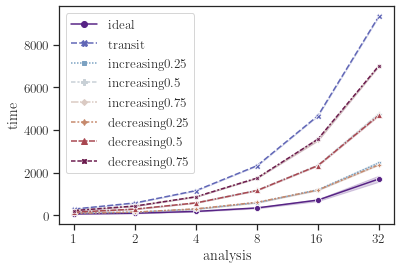

In [131]:
analysis_df = data_df[(data_df['simulation'] == 4) & (data_df['data'] == 4) & (data_df['node'] == 16)]
ax = sns.lineplot(x='analysis', y='time', style='scenario', hue='scenario', data=analysis_df, markers=True, palette=palette)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
ax.legend_.set_title("")
plt.savefig('analysis.pdf', bbox_inches='tight', dpi=12000)

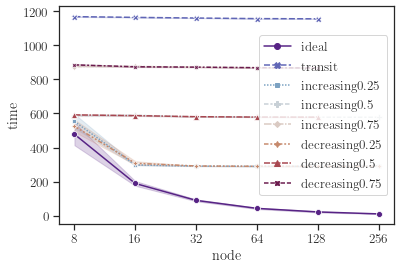

In [132]:
node_df = data_df[(data_df['simulation'] == 4) & (data_df['data'] == 4) & (data_df['analysis'] == 4)]
ax = sns.lineplot(x='node', y='time', hue='scenario', style='scenario', data=node_df, markers=True, palette=palette)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
ax.legend_.set_title("")
plt.savefig('node.pdf', bbox_inches='tight', dpi=12000)

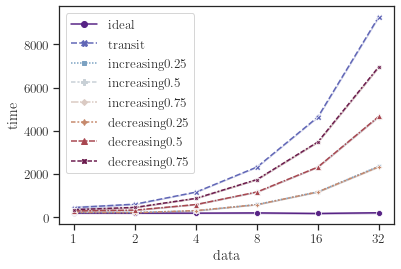

In [133]:
size_df = data_df[(data_df['simulation'] == 4) & (data_df['analysis'] == 4) & (data_df['node'] == 16)]
ax = sns.lineplot(x='data', y='time', hue='scenario', style='scenario', data=size_df, markers=True, palette=palette)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
ax.legend_.set_title("")
# plt.legend(loc=8)
plt.savefig('data.pdf', bbox_inches='tight', dpi=12000)

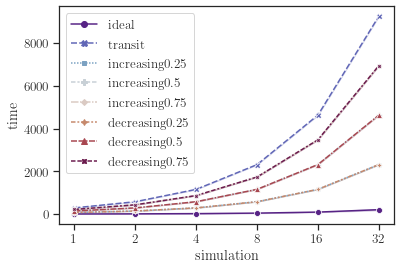

In [134]:
simulation_df = data_df[(data_df['data'] == 4) & (data_df['analysis'] == 4) & (data_df['node'] == 128)]
ax = sns.lineplot(x='simulation', y='time', hue='scenario', style='scenario', data=simulation_df, markers=True, palette=palette)
ax.set_xscale("log", base=2)
ax.get_xaxis().set_major_formatter(tck.FuncFormatter(lambda x, _: '%.0f'%x))
ax.legend_.set_title("")
plt.savefig('simulation.pdf', bbox_inches='tight', dpi=12000)